In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("shopping_trends_updated.csv")

In [3]:
df.describe() # tells some of the important things about the datasets

,Unnamed: 0.1,Unnamed: 0,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1949.500000,1949.500000,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,1125.977353,1125.977353,15.207589,23.685392,0.716223,14.447125
min,0.000000,0.000000,1.000000,18.000000,20.000000,2.500000,1.000000
25%,974.750000,974.750000,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1949.500000,1949.500000,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2924.250000,2924.250000,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3899.000000,3899.000000,3900.000000,70.000000,100.000000,5.000000,50.000000


In [146]:
df.shape #(no of rows, no of columns)

(3900, 20)

**What is the overall distribution of customer ages in the dataset?**

<bound method Axes.imshow of <Axes: title={'center': 'Age Distributions'}, xlabel='Age', ylabel='Count'>>

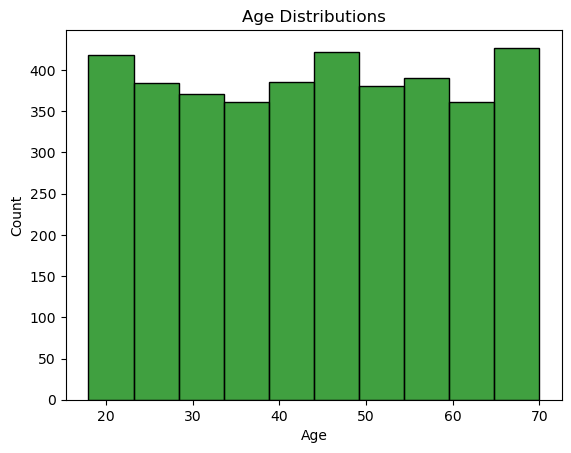

In [147]:
fig0 = sns.histplot(df['Age'], bins=10, color='green')
plt.title("Age Distributions")
fig0.imshow

**How does the average purchase amount vary across different product categories?**

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


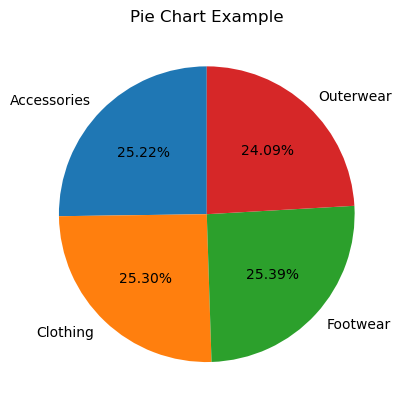

In [148]:
avg_purchase = df.groupby('Category')['Purchase Amount (USD)'].mean()
fig1=plt.pie(avg_purchase, labels=avg_purchase.index, autopct='%1.2f%%', startangle=90)
plt.title("Pie Chart Example")
print(avg_purchase)

**Which gender has the highest number of purchases?**

Gender
Male      2652
Female    1248
Name: count, dtype: int64


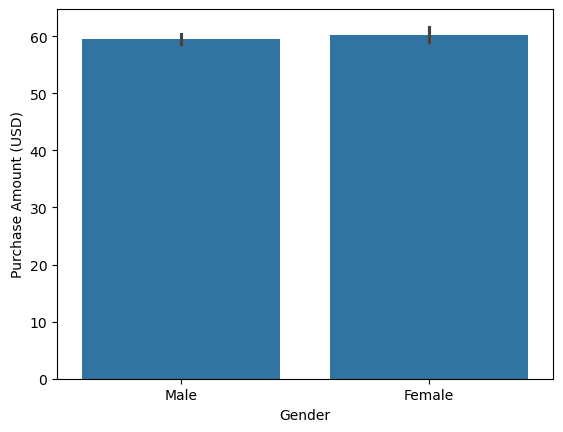

In [149]:
gender_count = df['Gender'].value_counts()
fig2=sns.barplot(df,x="Gender",y="Purchase Amount (USD)")
fig2.imshow
print(gender_count)


**What are the most commonly purchased items in each category?**

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64


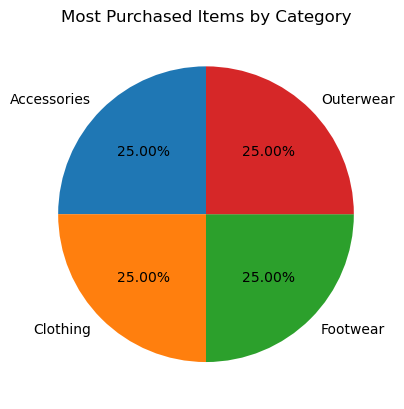

In [150]:
print(df.groupby('Category')['Item Purchased'].value_counts())
max_purch=df.groupby('Category')['Item Purchased'].agg(lambda x: x.value_counts().idxmax())
fig3 = plt.pie(max_purch.value_counts(), labels=max_purch.index, autopct='%1.2f%%', startangle=90)
plt.title("Most Purchased Items by Category")
plt.show()

**Are there any specific seasons or months where customer spending is significantly higher?**

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64


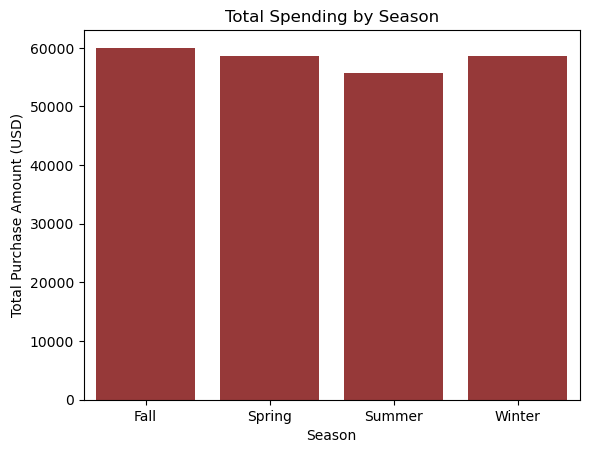

In [151]:
spending_month = df.groupby('Season')['Purchase Amount (USD)'].sum()
print(spending_month)
spending_month = spending_month.reset_index()
fig4 = sns.barplot(x='Season', y='Purchase Amount (USD)', data=spending_month,color='brown')
plt.title("Total Spending by Season")
plt.xlabel("Season")
plt.ylabel("Total Purchase Amount (USD)")
plt.show()

**What is the average rating given by customers for each product category?**

Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64


([0, 1, 2, 3],
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Clothing'),
  Text(2, 0, 'Footwear'),
  Text(3, 0, 'Outerwear')])

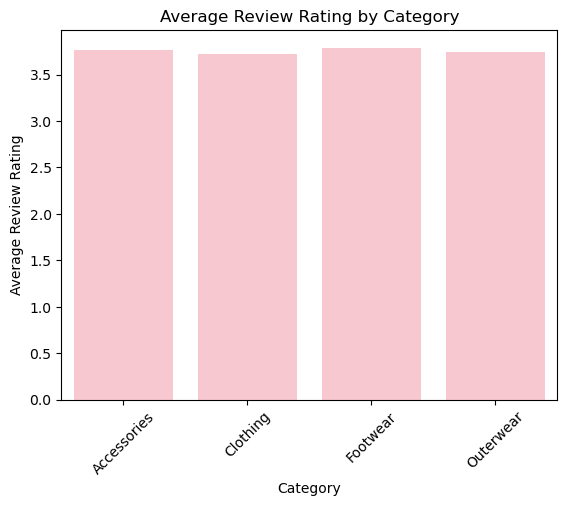

In [152]:
avg_rating_cat = df.groupby('Category')['Review Rating'].mean()
print(avg_rating_cat)
avg_rating_cat = avg_rating_cat.reset_index()
sns.barplot(x='Category', y='Review Rating', data=avg_rating_cat,color='pink')
plt.title("Average Review Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Review Rating")
plt.xticks(rotation=45)

**Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?**

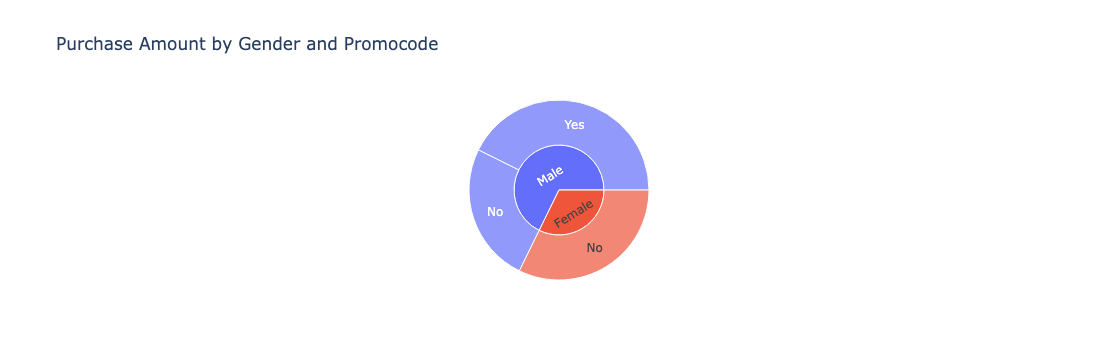

In [153]:
grouped_data = df.groupby(['Gender', 'Promo Code Used'])['Purchase Amount (USD)'].sum().reset_index()
fig = px.sunburst(
    grouped_data, 
    path=['Gender', 'Promo Code Used'],
    values='Purchase Amount (USD)',
    title="Purchase Amount by Gender and Promocode"
)
fig.show()

**Which payment method is the most popular among customers?**

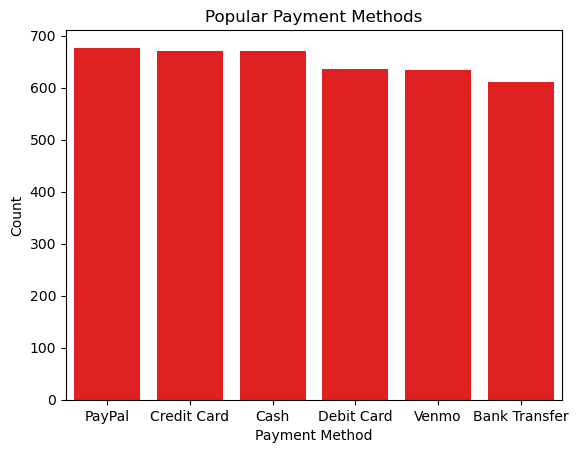

In [154]:
popular_payment = df['Payment Method'].value_counts().reset_index()
popular_payment.columns = ['Payment Method', 'Count']
sns.barplot(x='Payment Method', y='Count', data=popular_payment, color='red')
plt.title("Popular Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

**Do customers who use promo codes tend to spend more than those who don't?**

Promo Code Used
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64


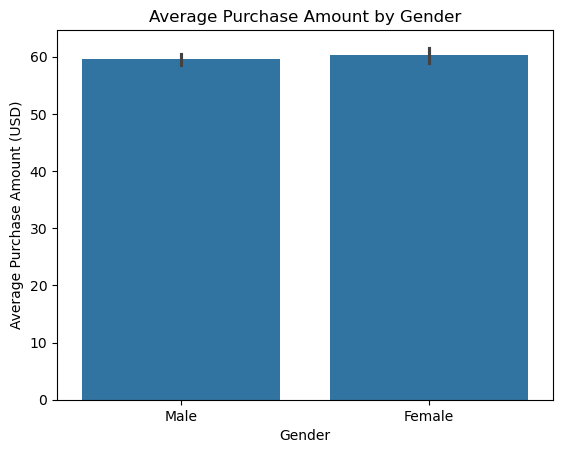

In [155]:
promo_vs_no_promo = df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()
print(promo_vs_no_promo)
fig6 = sns.barplot(x='Gender', y='Purchase Amount (USD)', data=df)

# Add title and labels
plt.title("Average Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Purchase Amount (USD)")

# Show the plot
plt.show()



**How does the presence of a discount affect the purchase decision of customers?**

In [6]:
discount_effect = df.groupby('Discount Applied')['Purchase Amount (USD)'].mean()
print(discount_effect)


Discount Applied
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64


**Are there any specific colors that are more popular among customers?**


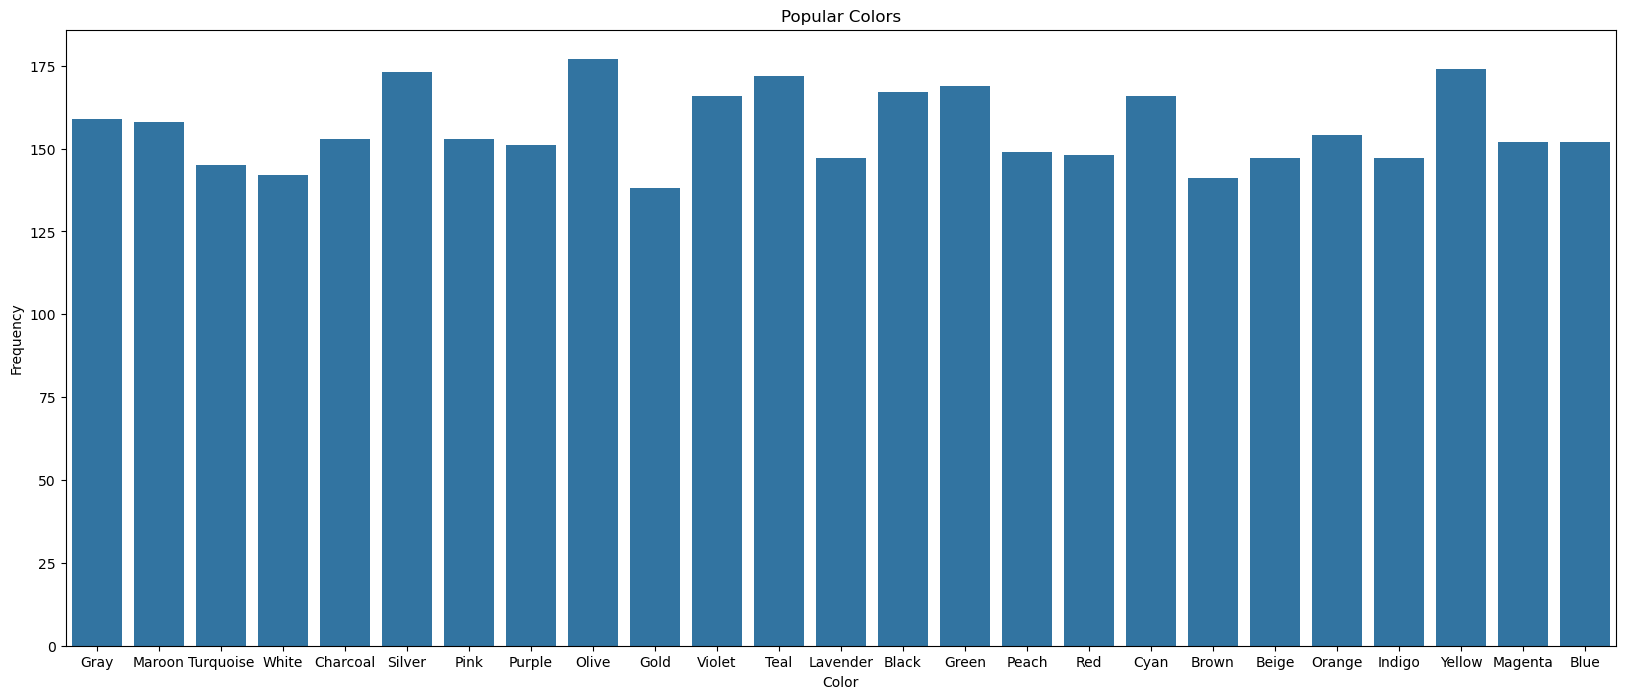

In [23]:
plt.figure(figsize=(20, 8))
sns.countplot(x='Color', data=df)
plt.title("Popular Colors")
plt.xlabel("Color")
plt.ylabel("Frequency")
plt.show()


**What is the average number of previous purchases made by customers?**

In [25]:
avg_previous_purchases = df['Previous Purchases'].mean()
print(avg_previous_purchases)


25.35153846153846


**How does the purchase amount differ based on the review ratings given by customers?**

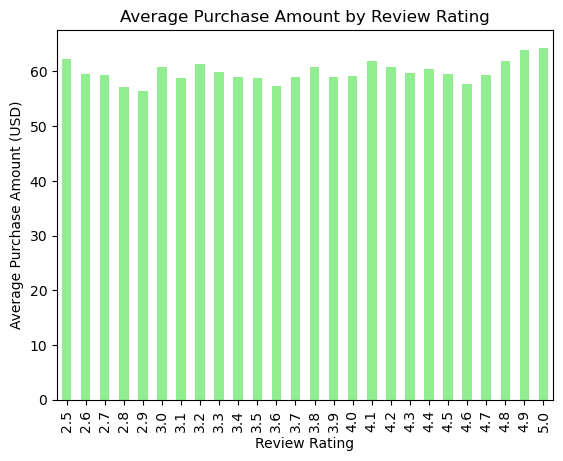

In [28]:
purchase_by_rating = df.groupby('Review Rating')['Purchase Amount (USD)'].mean()
purchase_by_rating.plot(kind='bar', color='lightgreen')
plt.title('Average Purchase Amount by Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


**Are there any noticeable differences in purchase behavior between different locations?**

In [33]:
purchase_by_location = df.groupby('Location')['Purchase Amount (USD)'].mean()
print(purchase_by_location)


Location
Alabama           59.112360
Alaska            67.597222
Arizona           66.553846
Arkansas          61.113924
California        59.000000
Colorado          56.293333
Connecticut       54.179487
Delaware          55.325581
Florida           55.852941
Georgia           58.797468
Hawaii            57.723077
Idaho             60.075269
Illinois          61.054348
Indiana           58.924051
Iowa              60.884058
Kansas            54.555556
Kentucky          55.721519
Louisiana         57.714286
Maine             56.987013
Maryland          55.755814
Massachusetts     60.888889
Michigan          62.095890
Minnesota         56.556818
Mississippi       61.037500
Missouri          57.913580
Montana           60.250000
Nebraska          59.448276
Nevada            63.379310
New Hampshire     59.422535
New Jersey        56.746269
New Mexico        61.901235
New York          60.425287
North Carolina    60.794872
North Dakota      62.891566
Ohio              60.376623
Oklahoma   

**How does the average purchase amount differ between male and female customers?**

In [34]:
avg_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].mean()
print(avg_purchase_by_gender)


Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64
